In [131]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import IPython.display as ipd

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (generate_binary_structure,
                                      binary_erosion)
from scipy.ndimage.morphology import iterate_structure


sampling_rate = 22050

C:\Users\Narwh\AppData\Local\Temp\ipykernel_2700\1809671178.py:8: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter
C:\Users\Narwh\AppData\Local\Temp\ipykernel_2700\1809671178.py:9: DeprecationWarning: Please use `generate_binary_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import (generate_binary_structure,
C:\Users\Narwh\AppData\Local\Temp\ipykernel_2700\1809671178.py:9: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import (generate_binary_structure,
C:\Users\Narwh\AppData\Local\Temp\ipykernel_2700\1809671178.py:11: DeprecationWarning: Please use `iterate_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` name

# Load and Plot Audio Samples

In [3]:
savedData = []
hashData = []
def plot_audio_sample(sample):    
     data, sr = librosa.load(sample)
     savedData.append(data)
     librosa.display.waveshow(data, sr=sr)

In [4]:
A = []
pathAudio = "Audio/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for x in files:
    A.append(x)    

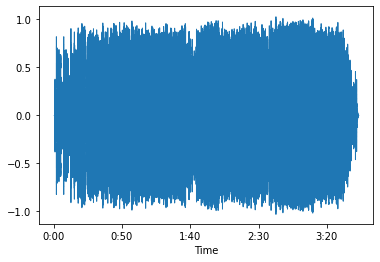

In [5]:
plot_audio_sample(A[0])

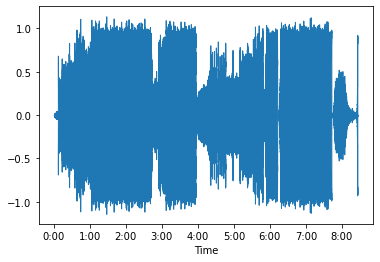

In [6]:
plot_audio_sample(A[1])

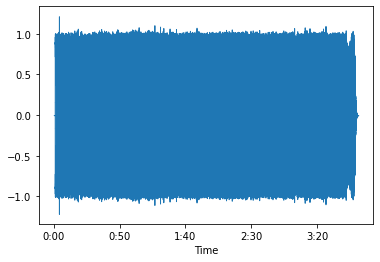

In [7]:
plot_audio_sample(A[2])

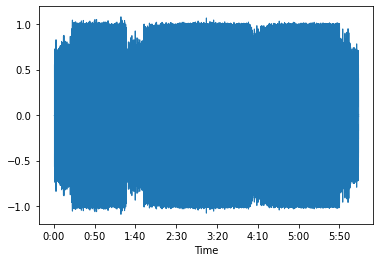

In [8]:
plot_audio_sample(A[3])

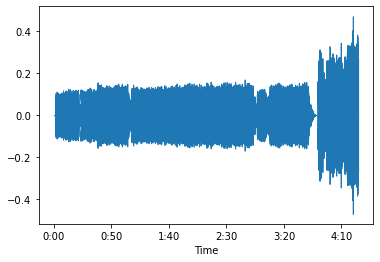

In [9]:
plot_audio_sample(A[4])

# Computing STFT  + Picking & Plotting Peaks + Hash Generator


# Song 1 STFT

In [10]:
specgram, freqs, times = mlab.specgram(savedData[0], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

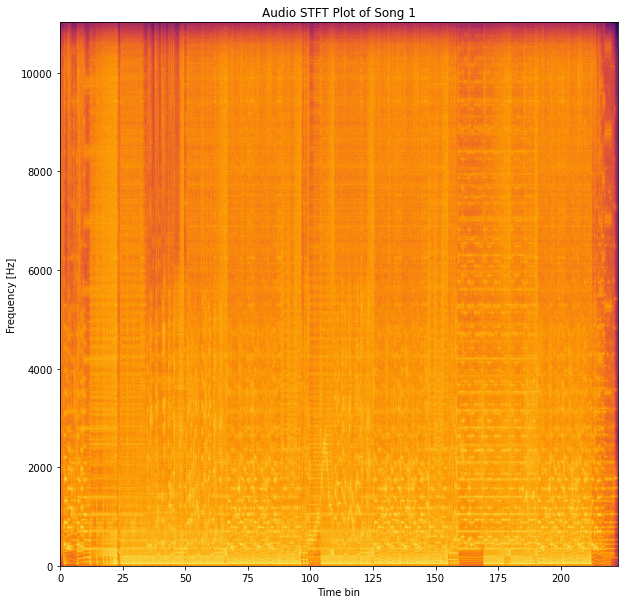

(2049, 2400)

In [11]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 1')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Peak 1

In [12]:
# Get 90% cutoff threshold
def find_90_C_k(spec_gram):
    spec_gram = spec_gram[spec_gram != 0] #remove 0's
    specgram_flattened = spec_gram.flatten() #returns copy of orig
    specgram_sorted = np.sort(np.log(np.abs(specgram_flattened)))
    specgram_length = len(specgram_sorted)
    
    ninety_index = int(0.9 * specgram_length)
    ninety_C_k = specgram_sorted[ninety_index]
    return ninety_C_k

In [13]:
def spectogram_to_peaks(specgram, freqs, times):
    fp = generate_binary_structure(2, 1)
    fp = iterate_structure(fp, 20)
    background_threshold = find_90_C_k(specgram)
    peaks = ((specgram == maximum_filter(specgram, footprint = fp)) & (specgram > background_threshold))
    return peaks

In [14]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

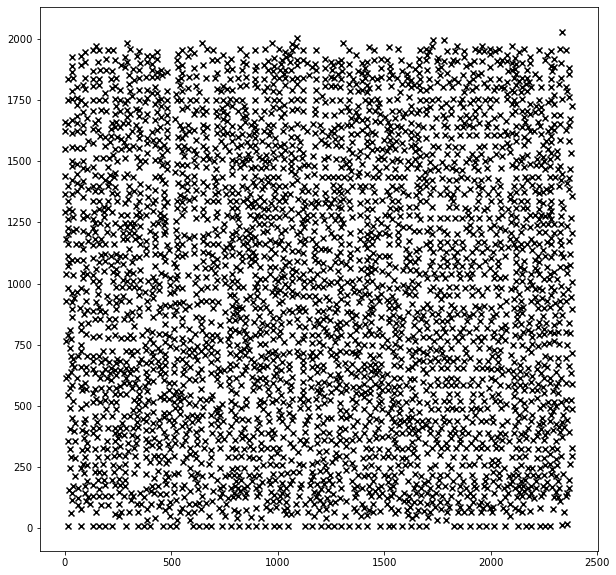

In [15]:
fig2 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

In [16]:
print(specgram.shape)

(2049, 2400)


# Hash Generator + 1st Hash

In [17]:
import hashlib

def create_fingerprints(peaks):
    hashes = []
    for i in range(len(peaks)):
        for j in range(1, 15):
            if (i + j) < len(peaks):
                t1 = peaks[i][0]
                t2 = peaks[i + j][0]
                freq1 = peaks[i][1]
                freq2 = peaks[i + j][1]
                delta = t2 - t1

                hash = hashlib.sha1(str(str(freq1) + str(freq2) + str(delta)).encode('utf-8'))

                hashes.append((hash.hexdigest(), t1))

    return hashes

In [18]:
peaksList = list(zip(x_frame, y_freq))
fp1 = create_fingerprints(peaksList)
fp1

[('13b8e826d28c66ddd9865e5823b443ef843e47ea', 17),
 ('9163113b3bf6ddcf821ba5ee1443a57ba7fc41e0', 17),
 ('1afe98f5e5be2cd32c2b47781e0605cb42b6f5f2', 17),
 ('de4e16eef69cdbbd726f08a113c5808959bb703c', 17),
 ('b0eacf3200af1286b5277f53cf1f9c7749897634', 17),
 ('b2b2bd2374280a0a55c377ccc18f2737cdf730b8', 17),
 ('93b6bcff67ea8451c3727efd2c0fb72a673e986e', 17),
 ('3a435b3f6c1dddbc0b9622a28da1b360c86d23af', 17),
 ('be5521a170755d1df1fda747550fc5ebc2720c61', 17),
 ('2cae680bf3295422a348d3a18d7e73652b68eeca', 17),
 ('64cf3e912628355f306c2b15ee499b7181791678', 17),
 ('577f42744396a99cc62f52fa5a87edcb77e141bf', 17),
 ('e389f207c6d452e164e928f2f79441d16e3ce0fa', 17),
 ('ac751d22c68cc6ba639b43cedc5e5c4102d9e207', 17),
 ('1f0995e3846723d9eeebb9aa1490d30a18e6b0dc', 130),
 ('6c2a0be544bc620c49eae45cbb62b9109ec120db', 130),
 ('84bcabb7d7b6d80323a83cac861f8254e6368ee2', 130),
 ('4e3fbbb4b437c5ef96ed4b2392999bd25701bed2', 130),
 ('1cb5f946e9f49d14f61902961195c8999ed4198e', 130),
 ('683c4b1415a7d09bd6ec93f

# Song 2 STFT

In [19]:
specgram, freqs, times = mlab.specgram(savedData[1], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

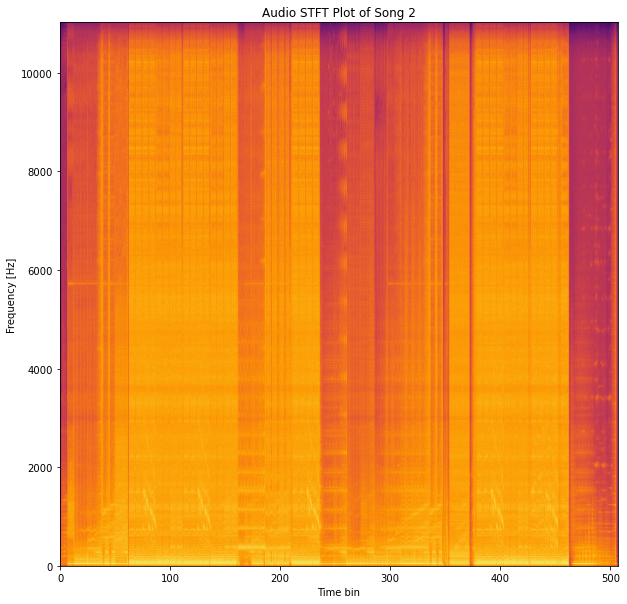

(2049, 5458)

In [20]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 2')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

In [21]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

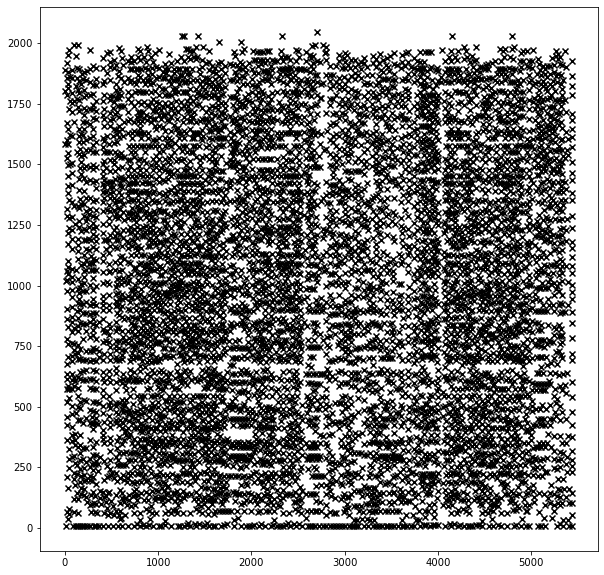

In [22]:
fig3 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

In [23]:
print(specgram.shape)

(2049, 5458)


# 2nd Hash

In [24]:
peaksList = list(zip(x_frame, y_freq))
fp2 = create_fingerprints(peaksList)
fp2

[('d4854306ba5b7a0ba6284caecfe7c9bf27d403bf', 15),
 ('5e393c2484edc7230e56ed092fd2e2f259baafdc', 15),
 ('281a4ce23c52e5d5123e92fbc1a04a882000547b', 15),
 ('53e6d089c44dd49d914fc96d8f7917042f40dc41', 15),
 ('9ac908950a46f99b1d9d066499aa4a35dd79469e', 15),
 ('84261a76499f58566e3df4c30dcc215bf7b60e33', 15),
 ('e979b1c575ba4cd266929988bfd43b1d74d36609', 15),
 ('ed494bbd838ce3b86ba7b38cf6a25ac31a8c1015', 15),
 ('c7a141a8884de3cf87e6762c77242db775e186c3', 15),
 ('3173a752f9d4f6e1220ecdea40120cdc01989984', 15),
 ('e8a351203454b98da1c1a0acbc7c352e8870e666', 15),
 ('ff1f022c23a015a4853b8e34738723f7a849917b', 15),
 ('e95df19bf1677272397a068802897e67f9512b89', 15),
 ('dca5432575c08343a98da163d89e5785fa3580ea', 15),
 ('df915665f12436bb4251ad0bbb5850be3b122e8a', 5344),
 ('264025f9dab357c05b51f6ece4a6bdf0331052c7', 5344),
 ('e25c07bb732fd92e7635415aab63a6fddaeb635a', 5344),
 ('f80b098e73317cd4850b1297a3238836da3d8670', 5344),
 ('8fa61002f6c653bed2dc24170720b08a05dc6476', 5344),
 ('fc1dc2d652fd5cde42

# Song 3 STFT

In [25]:
specgram, freqs, times = mlab.specgram(savedData[2], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

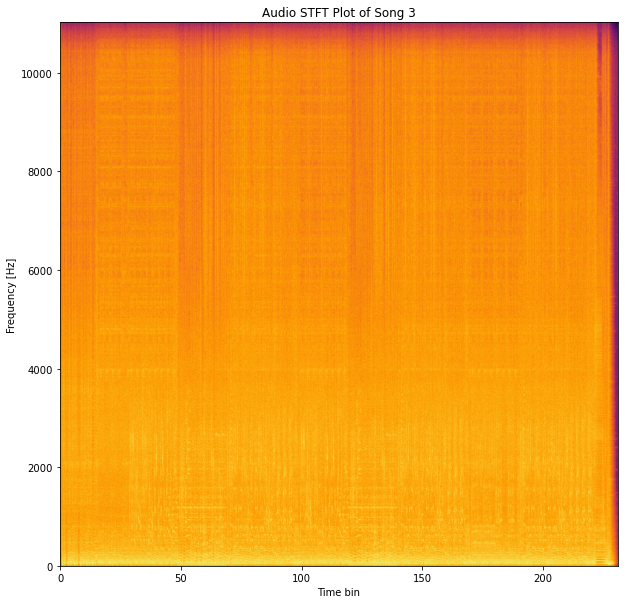

(2049, 2487)

In [26]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 3')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Peak 3

In [27]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

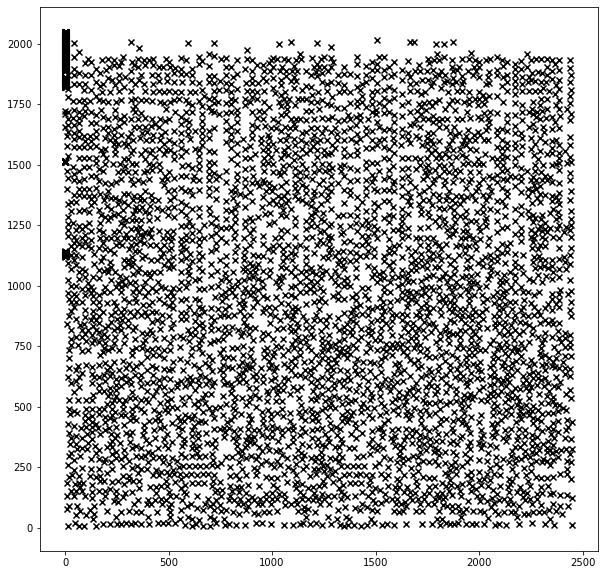

In [28]:
fig3 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

In [29]:
print(specgram.shape)

(2049, 2487)


# 3rd Hash

In [30]:
peaksList = list(zip(x_frame, y_freq))
fp3 = create_fingerprints(peaksList)
fp3

[('6971bcc0cae4f37b9273a7959276b41095e72cb2', 614),
 ('4c3741df2b57196b7d0e1bdfc7e83df7c1755105', 614),
 ('4a17f351254bf902c2874e4e140215005a9e06a8', 614),
 ('73b9ef968a4d82edc39bcd45b6b07ed273a81a9a', 614),
 ('8574205fb6300b193cb751c1ed1abe986e302ad6', 614),
 ('9fb71afaa1cc8566a3d3d0d17be9f590a40e637a', 614),
 ('98aed5e4a4600ae41150df969909fffdb2d416ba', 614),
 ('2a5868f5e67be3f2b03b2bad93acc96df9b16dfe', 614),
 ('ef8ff9ab813450aafc40d67ca2bfd4c639161789', 614),
 ('c8474b3b753d69559d1e43226ac0ac278b4ff21b', 614),
 ('05d6008cbfc6145154164a3db66af6662b5240c4', 614),
 ('69d859defa51880b05c0ef49b00c226cbc383971', 614),
 ('904c0ef3d8e5f93cca36a3e84012f36b15c9c174', 614),
 ('f50292aa8f3debd8f386a9f205901ddd407a28c8', 614),
 ('6894695f909c6d426d04afa11b4fe4875e3df157', 1430),
 ('fe71ed62bf116f804caa82fda88f589aadf122bd', 1430),
 ('271a0e97d1a199d9d8636cec8eab54da19fe97c3', 1430),
 ('10b693888930f7886b21edf9cd06ea86a9273461', 1430),
 ('67edc7d083599823026495d9df137d25ec3be01c', 1430),
 ('12be

# Song 4 STFT


In [31]:
specgram, freqs, times = mlab.specgram(savedData[3], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

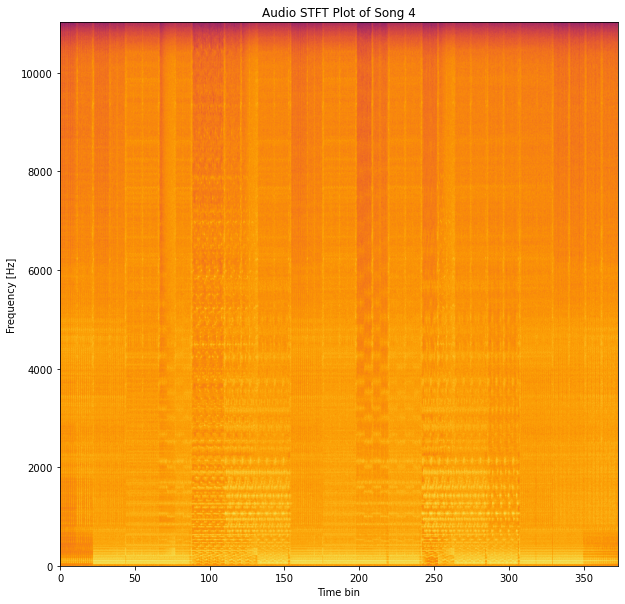

(2049, 4016)

In [32]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 4')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Peak 4

In [33]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

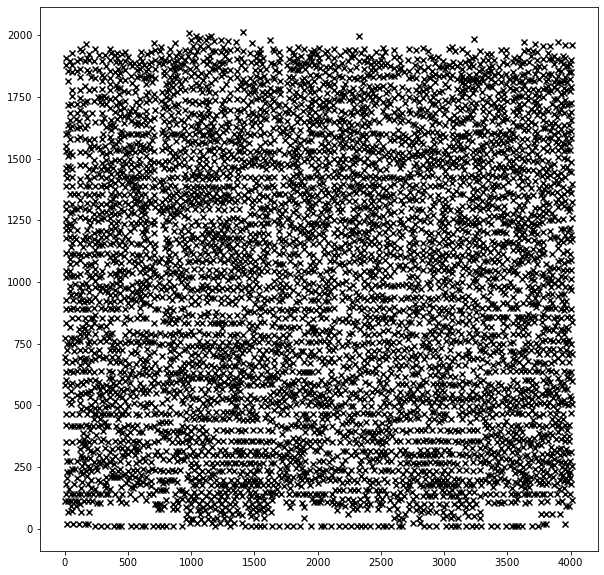

In [34]:
fig3 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

In [35]:
print(specgram.shape)

(2049, 4016)


# 4th Hash

In [36]:
peaksList = list(zip(x_frame, y_freq))
fp1 = create_fingerprints(peaksList)
fp1

[('2ace02cc2435c4f9b74ca3d3605931801ddf24a1', 387),
 ('eca73c9b3d51262bb00a23e526207e85d94a2213', 387),
 ('14715fbad23530fa914e9595f4bc7da5859d97ca', 387),
 ('bbdc657b017012cf535f680b98cc96d2ccb1e31a', 387),
 ('08ce047116f4b9cca45518f4c8d2eb005ffab80e', 387),
 ('4e6ebb9d148d2fbacc46a75bc6c1abd28305866e', 387),
 ('236e5666de9a9bf27e3a5d0d12a8b1a6237baac0', 387),
 ('71f0f34beffe8724c836bf86862f312d5f9e9326', 387),
 ('01eab79c9f274dc177ab031c13aa7df91a94c1ea', 387),
 ('fa7356d5f0bbe79c2b294aafd054f6ee92e4d36c', 387),
 ('2092c4d0c19d87cb27faf8e19153c5760a83a579', 387),
 ('a07e9cc0d90dc6852ae230ca994525f521c05703', 387),
 ('fb7a9e3c31b3832f93f786309e3615160e880eff', 387),
 ('ab47008ba48eaad97ea83ff3f7359e2284af8840', 387),
 ('4b1070da13267f58f98cde93ebd96067a7263521', 424),
 ('9bd74bde1139f6a64e058e5860b650d86513101e', 424),
 ('11df6a618e69e55e49d89090cc22e1f8aca1932b', 424),
 ('e50442aeeb9a8a1b2525511cddf4b8ad811064d7', 424),
 ('907bddbfcf0d41a6c42b1de394b6d70d574669d5', 424),
 ('eca49fd24

# Song 5 STFT

In [37]:
specgram, freqs, times = mlab.specgram(savedData[4], NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

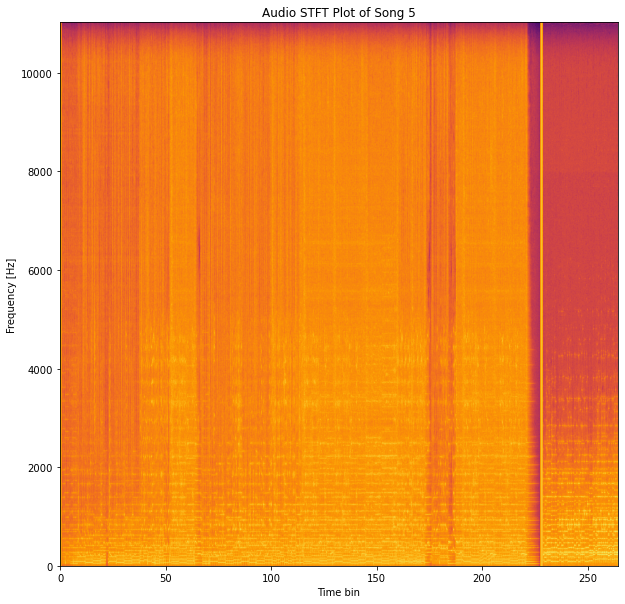

(2049, 2846)

In [38]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Song 5')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Peak 5

In [39]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

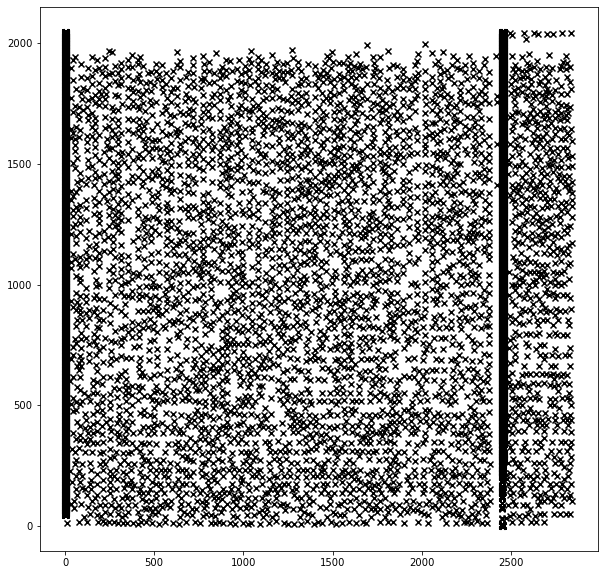

In [40]:
fig3 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

In [41]:
print(specgram.shape)

(2049, 2846)


# 5th Hash

In [42]:
peaksList = list(zip(x_frame, y_freq))
fp5 = create_fingerprints(peaksList)
fp5

[('e193a01ecf8d30ad0affefd332ce934e32ffce72', 2449),
 ('6fc978af728d43c59faa400d5f6e0471ac850d4c', 2449),
 ('221407c03ae5c73109cce71d27e24637824f3333', 2449),
 ('c63528a52274a35d1c07bd9e55a83c6eb073de81', 2449),
 ('de1f53b6fbc3fecd35b0bbc963e21902a149e5e3', 2449),
 ('20dd129da16a9afb802d8b595485f8d2719aea44', 2449),
 ('15346b593c4d0cf05fb6e67a5669d852e6550481', 2449),
 ('52c24d49be8ef49d19f9983b6c3d1c5892c593db', 2449),
 ('19b3f0ed02e60c8bae808b496b3cce99dc8f9e69', 2449),
 ('47ab9979443fb7ed1c193d06773333ba7876094f', 2449),
 ('e7001334d9d19559a8bb0dd6015f16e31d15566c', 2449),
 ('c4a2d99bc28d236098a095277b7eb0718d6be068', 2449),
 ('7c12b5f75af904d7adffb56a0611ab308d8698c4', 2449),
 ('c24c173dae0e230c94ab301f276b5ad1366e71c1', 2449),
 ('e193a01ecf8d30ad0affefd332ce934e32ffce72', 2450),
 ('6fc978af728d43c59faa400d5f6e0471ac850d4c', 2450),
 ('221407c03ae5c73109cce71d27e24637824f3333', 2450),
 ('c63528a52274a35d1c07bd9e55a83c6eb073de81', 2450),
 ('de1f53b6fbc3fecd35b0bbc963e21902a149e5e3', 